In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [2]:
DATA_DIR = '/home/iiticos/Desktop/Personal Docs/QC/IMC-Prosperity_2024/Data/round5/'


In [3]:
# specify the directory path
directory_path = DATA_DIR+"*.csv"

# use glob to get all CSV file names in the directory
csv_files = glob.glob(directory_path)
print(csv_files)


['/home/iiticos/Desktop/Personal Docs/QC/IMC-Prosperity_2024/Data/round5/trades_round_3_day_2_wn.csv', '/home/iiticos/Desktop/Personal Docs/QC/IMC-Prosperity_2024/Data/round5/trades_round_1_day_0_wn.csv', '/home/iiticos/Desktop/Personal Docs/QC/IMC-Prosperity_2024/Data/round5/trades_round_4_day_2_wn.csv', '/home/iiticos/Desktop/Personal Docs/QC/IMC-Prosperity_2024/Data/round5/trades_round_4_day_1_wn.csv', '/home/iiticos/Desktop/Personal Docs/QC/IMC-Prosperity_2024/Data/round5/trades_round_1_day_-1_wn.csv', '/home/iiticos/Desktop/Personal Docs/QC/IMC-Prosperity_2024/Data/round5/trades_round_4_day_3_wn.csv', '/home/iiticos/Desktop/Personal Docs/QC/IMC-Prosperity_2024/Data/round5/trades_round_1_day_-2_wn.csv', '/home/iiticos/Desktop/Personal Docs/QC/IMC-Prosperity_2024/Data/round5/trades_round_3_day_1_wn.csv', '/home/iiticos/Desktop/Personal Docs/QC/IMC-Prosperity_2024/Data/round5/trades_round_3_day_0_wn.csv']


In [4]:

# initialize an empty list to store dataframes
dfs = []
df_1 = pd.DataFrame()
# loop through the CSV files and read them into dataframes
for csv_file in csv_files:
    df = pd.read_csv(csv_file, sep=";")
    df['Ones'] = 1
    dfs.append(df)
    df_1 = pd.concat([df,df_1])


In [5]:
total_dp = 0
for i in dfs:
    a, b = i.shape
    total_dp += a
    # print(a)

print(total_dp, "df_1", df_1.shape)

32651 df_1 (32651, 8)


In [6]:
dfs[0]

,timestamp,buyer,seller,symbol,currency,price,quantity,Ones
0,0,Vinnie,Remy,CHOCOLATE,SEASHELLS,7888.0,8,1
1,200,Remy,Vinnie,STRAWBERRIES,SEASHELLS,4038.0,7,1
2,200,Remy,Vinnie,CHOCOLATE,SEASHELLS,7891.0,8,1
3,600,Remy,Vinnie,CHOCOLATE,SEASHELLS,7890.0,5,1
4,700,Vinnie,Vladimir,STRAWBERRIES,SEASHELLS,4037.0,3,1
...,...,...,...,...,...,...,...,...
3796,997900,Ruby,Vladimir,GIFT_BASKET,SEASHELLS,69478.0,5,1
3797,998400,Remy,Vinnie,STRAWBERRIES,SEASHELLS,3985.0,4,1
3798,998800,Vinnie,Remy,CHOCOLATE,SEASHELLS,7752.0,7,1
3799,998900,Vinnie,Remy,ROSES,SEASHELLS,14404.0,5,1


In [7]:
# Assuming the dataframe is named `df`(9, 9
def print_trade_matrix(df):
    # Create a pivot table with the number of trades between each pair of buyers and sellers
    trade_matrix = df.pivot_table(index='buyer', columns='seller', values='Ones', aggfunc='sum')
    trade_matrix = trade_matrix.fillna(0)
    return trade_matrix

# Example usage
mat = print_trade_matrix(df_1)
mat

seller,Adam,Amelia,Raj,Remy,Rhianna,Ruby,Valentina,Vinnie,Vladimir
buyer,,,,,,,,,
Adam,0.0,0.0,0.0,60.0,13.0,5.0,170.0,16.0,99.0
Amelia,5.0,0.0,0.0,31.0,13.0,3.0,342.0,173.0,74.0
Raj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210.0,0.0
Remy,52.0,46.0,0.0,172.0,161.0,65.0,2661.0,4458.0,1005.0
Rhianna,21.0,11.0,0.0,149.0,0.0,23.0,681.0,419.0,390.0
Ruby,12.0,3.0,0.0,45.0,24.0,0.0,867.0,526.0,283.0
Valentina,147.0,326.0,0.0,2870.0,1099.0,944.0,311.0,1787.0,4.0
Vinnie,56.0,167.0,221.0,4818.0,541.0,599.0,1.0,1173.0,2072.0
Vladimir,100.0,74.0,0.0,1019.0,545.0,325.0,11.0,153.0,0.0


In [8]:
print("total values in matrix",mat.sum().sum(), "\ntotal datapoints in df1", df_1.shape[0])

total values in matrix 32651.0 
total datapoints in df1 32651


In [9]:
def check_name_in_df(df, name):
    # Check if name exists in buyer column
    if name in df['buyer'].values:
        return True

    # Check if name exists in seller column
    if name in df['seller'].values:
        return True

    # Name not found in either column
    return False

In [10]:
# Create a dictionary with the desired column names and empty lists as values
data = {"name": [], "present": []}

# Append the desired names to the "name" list
names = ["Valentina", "Vinnie", "Vladimir", "Vivian", "Celeste", "Colin", "Carlos", "Camilla", "Pablo", "Penelope", "Percy", "Petunia", "Ruby", "Remy", "Rihanna", "Raj", "Amelia", "Adam", "Alina", "Amir"]
data["name"] = names
for i in names:
    if check_name_in_df(df_1,i):
        data["present"].append(True)
    else:
        data["present"].append(False)
# Create a DataFrame from the dictionary
df = pd.DataFrame(data)
df

,name,present
0,Valentina,True
1,Vinnie,True
2,Vladimir,True
3,Vivian,False
4,Celeste,False
5,Colin,False
6,Carlos,False
7,Camilla,False
8,Pablo,False
9,Penelope,False


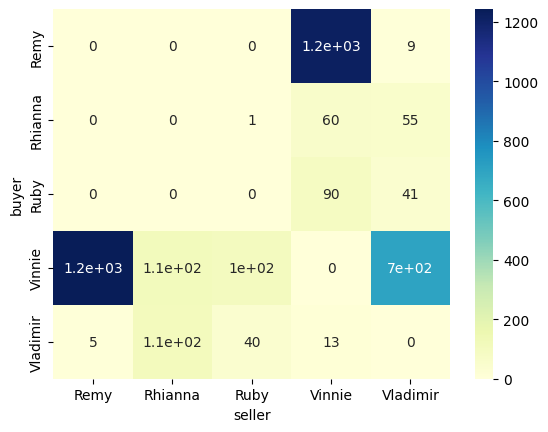

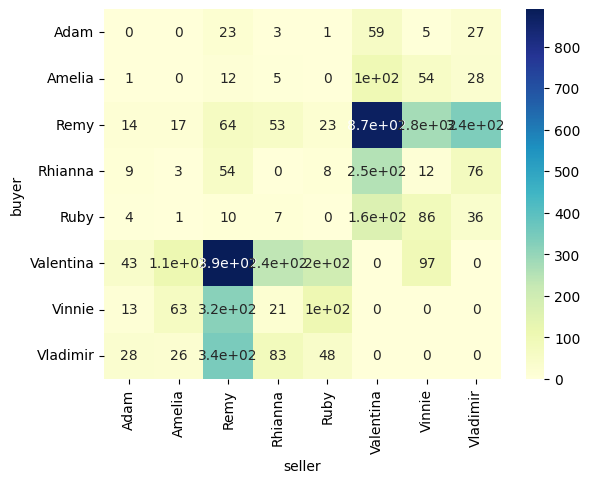

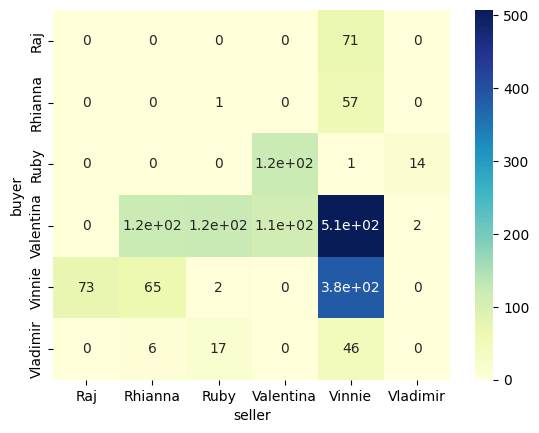

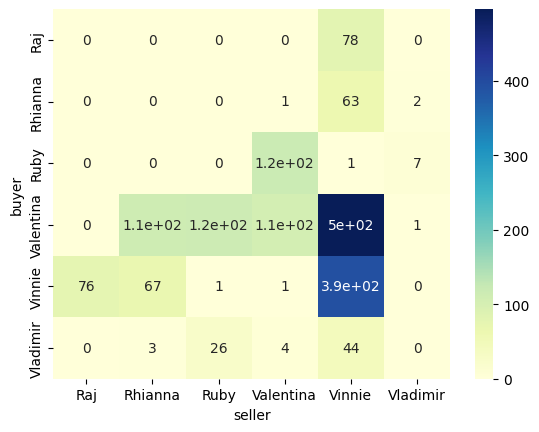

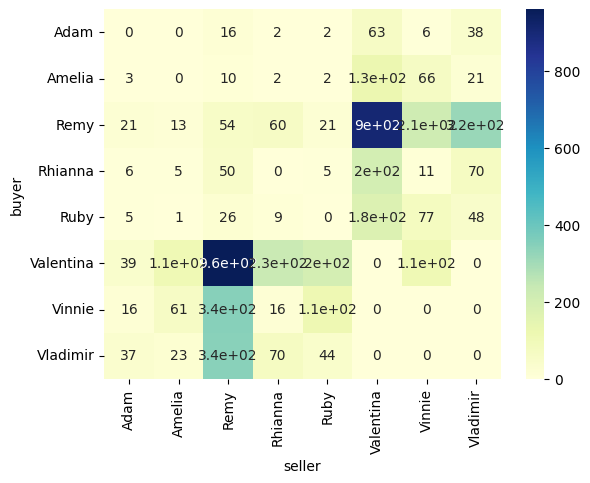

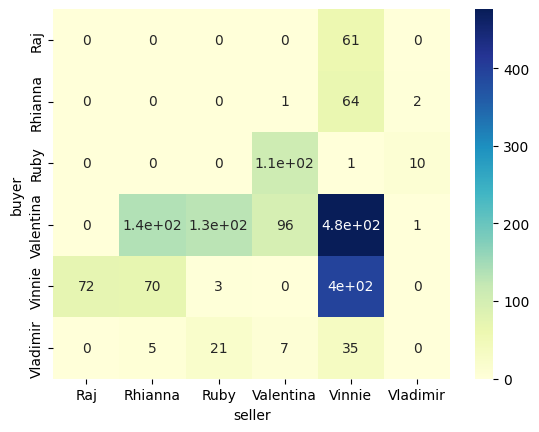

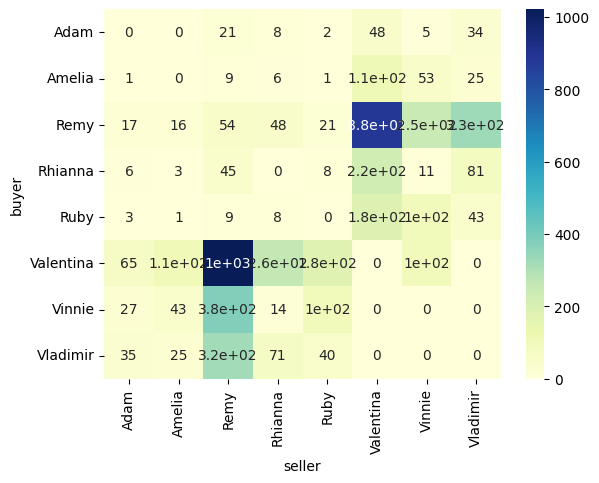

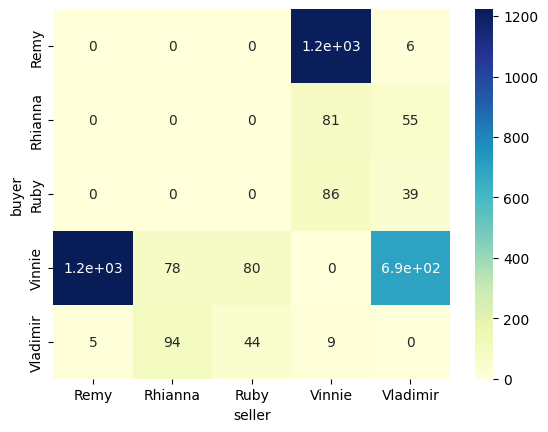

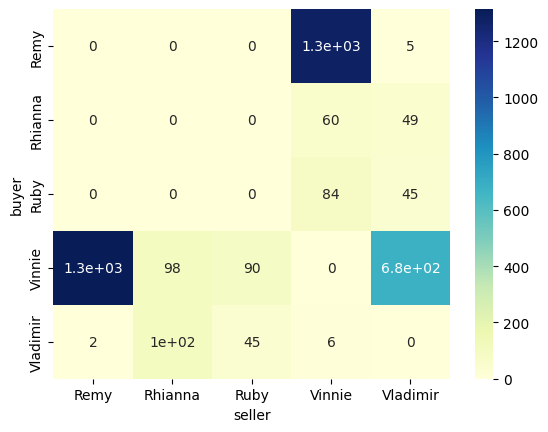

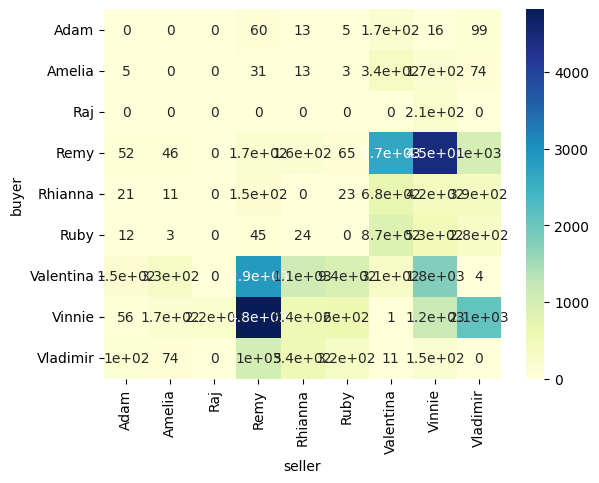

In [11]:
def plot_as_heatmap(df):
    mat = print_trade_matrix(df)
    sns.heatmap(mat,annot = True, cmap='YlGnBu')
    plt.show()


df_final = dfs
df_final.append(df_1)

for i in df_final:
    plot_as_heatmap(i)


In [12]:
# Initialize a dictionary to store the profit of each trader
trader_profit = {}
order_book = df_1
# Iterate through the order book
for i in range(len(order_book)):
    # Get the current row of the order book as a dictionary
    row = order_book.iloc[i].to_dict()
    
    # Calculate the profit made by the seller
    if row['buyer'] != row['seller']:
        seller_profit = row['quantity'] * (row['price'] * (1)) # assuming a 1% transaction fee
        if row['seller'] in trader_profit:
            trader_profit[row['seller']] += seller_profit
        else:
            trader_profit[row['seller']] = seller_profit

# Print the profit of each trader
for trader, profit in trader_profit.items():
    print(f"Trader {trader} made a profit of {profit} seashells.")


Trader Vinnie made a profit of 262990877.0 seashells.
Trader Rhianna made a profit of 155182635.0 seashells.
Trader Remy made a profit of 197839956.0 seashells.
Trader Vladimir made a profit of 232234867.0 seashells.
Trader Ruby made a profit of 140555545.0 seashells.
Trader Valentina made a profit of 94051593.0 seashells.
Trader Amelia made a profit of 27282592.0 seashells.
Trader Adam made a profit of 11796955.0 seashells.
Trader Raj made a profit of 17038142.0 seashells.


In [13]:
for trader, profit in sorted(trader_profit.items(), key=lambda x: x[1], reverse=True):
    print(f"Trader {trader} made a profit of {profit:.2f} seashells.")

Trader Vinnie made a profit of 262990877.00 seashells.
Trader Vladimir made a profit of 232234867.00 seashells.
Trader Remy made a profit of 197839956.00 seashells.
Trader Rhianna made a profit of 155182635.00 seashells.
Trader Ruby made a profit of 140555545.00 seashells.
Trader Valentina made a profit of 94051593.00 seashells.
Trader Amelia made a profit of 27282592.00 seashells.
Trader Raj made a profit of 17038142.00 seashells.
Trader Adam made a profit of 11796955.00 seashells.


In [14]:
# Initialize a dictionary to store the profit of each trader
trader_profit = {}
good_profit = {}

# Iterate through the order book
for i in range(len(order_book)):
    # Get the current row of the order book as a dictionary
    row = order_book.iloc[i].to_dict()
    
    # Calculate the profit made by the seller
    if row['buyer']!= row['seller']:
        seller_profit = row['quantity'] * (row['price'] * (1 - 0.01)) # assuming a 1% transaction fee
        if row['seller'] in trader_profit:
            trader_profit[row['seller']] += seller_profit
        else:
            trader_profit[row['seller']] = seller_profit
        
        # Calculate the profit from each good
        symbol = row['symbol']
        if symbol in good_profit:
            if row['seller'] in good_profit[symbol]:
                good_profit[symbol][row['seller']] += seller_profit
            else:
                good_profit[symbol][row['seller']] = seller_profit
        else:
            good_profit[symbol] = {row['seller']: seller_profit}

# Print the profit of each trader in descending order
for trader, profit in sorted(trader_profit.items(), key=lambda x: x[1], reverse=True):
    print(f"Trader {trader} made a profit of {profit} seashells.")

# Print the profit from each good for the trader with the most profit
top_trader = max(trader_profit, key=trader_profit.get)
print(f"\nThe trader with the most profit is {top_trader}.")
for good, profit_dict in good_profit.items():
    print(f"- {good}: {sum(profit_dict.values())} seashells")

Trader Vinnie made a profit of 260360968.23000115 seashells.
Trader Vladimir made a profit of 229912518.32999554 seashells.
Trader Remy made a profit of 195861556.44000188 seashells.
Trader Rhianna made a profit of 153630808.64999962 seashells.
Trader Ruby made a profit of 139149989.5500007 seashells.
Trader Valentina made a profit of 93111077.07000013 seashells.
Trader Amelia made a profit of 27009766.079999905 seashells.
Trader Raj made a profit of 16867760.579999994 seashells.
Trader Adam made a profit of 11678985.449999984 seashells.

The trader with the most profit is Vinnie.
- ROSES: 151467409.16999996 seashells
- CHOCOLATE: 147867756.30000013 seashells
- STRAWBERRIES: 103423176.45000005 seashells
- GIFT_BASKET: 387104098.5899999 seashells
- AMETHYSTS: 149885421.83999923 seashells
- STARFRUIT: 124234114.94999993 seashells
- COCONUT_COUPON: 23494934.430000003 seashells
- COCONUT: 40106518.650000006 seashells


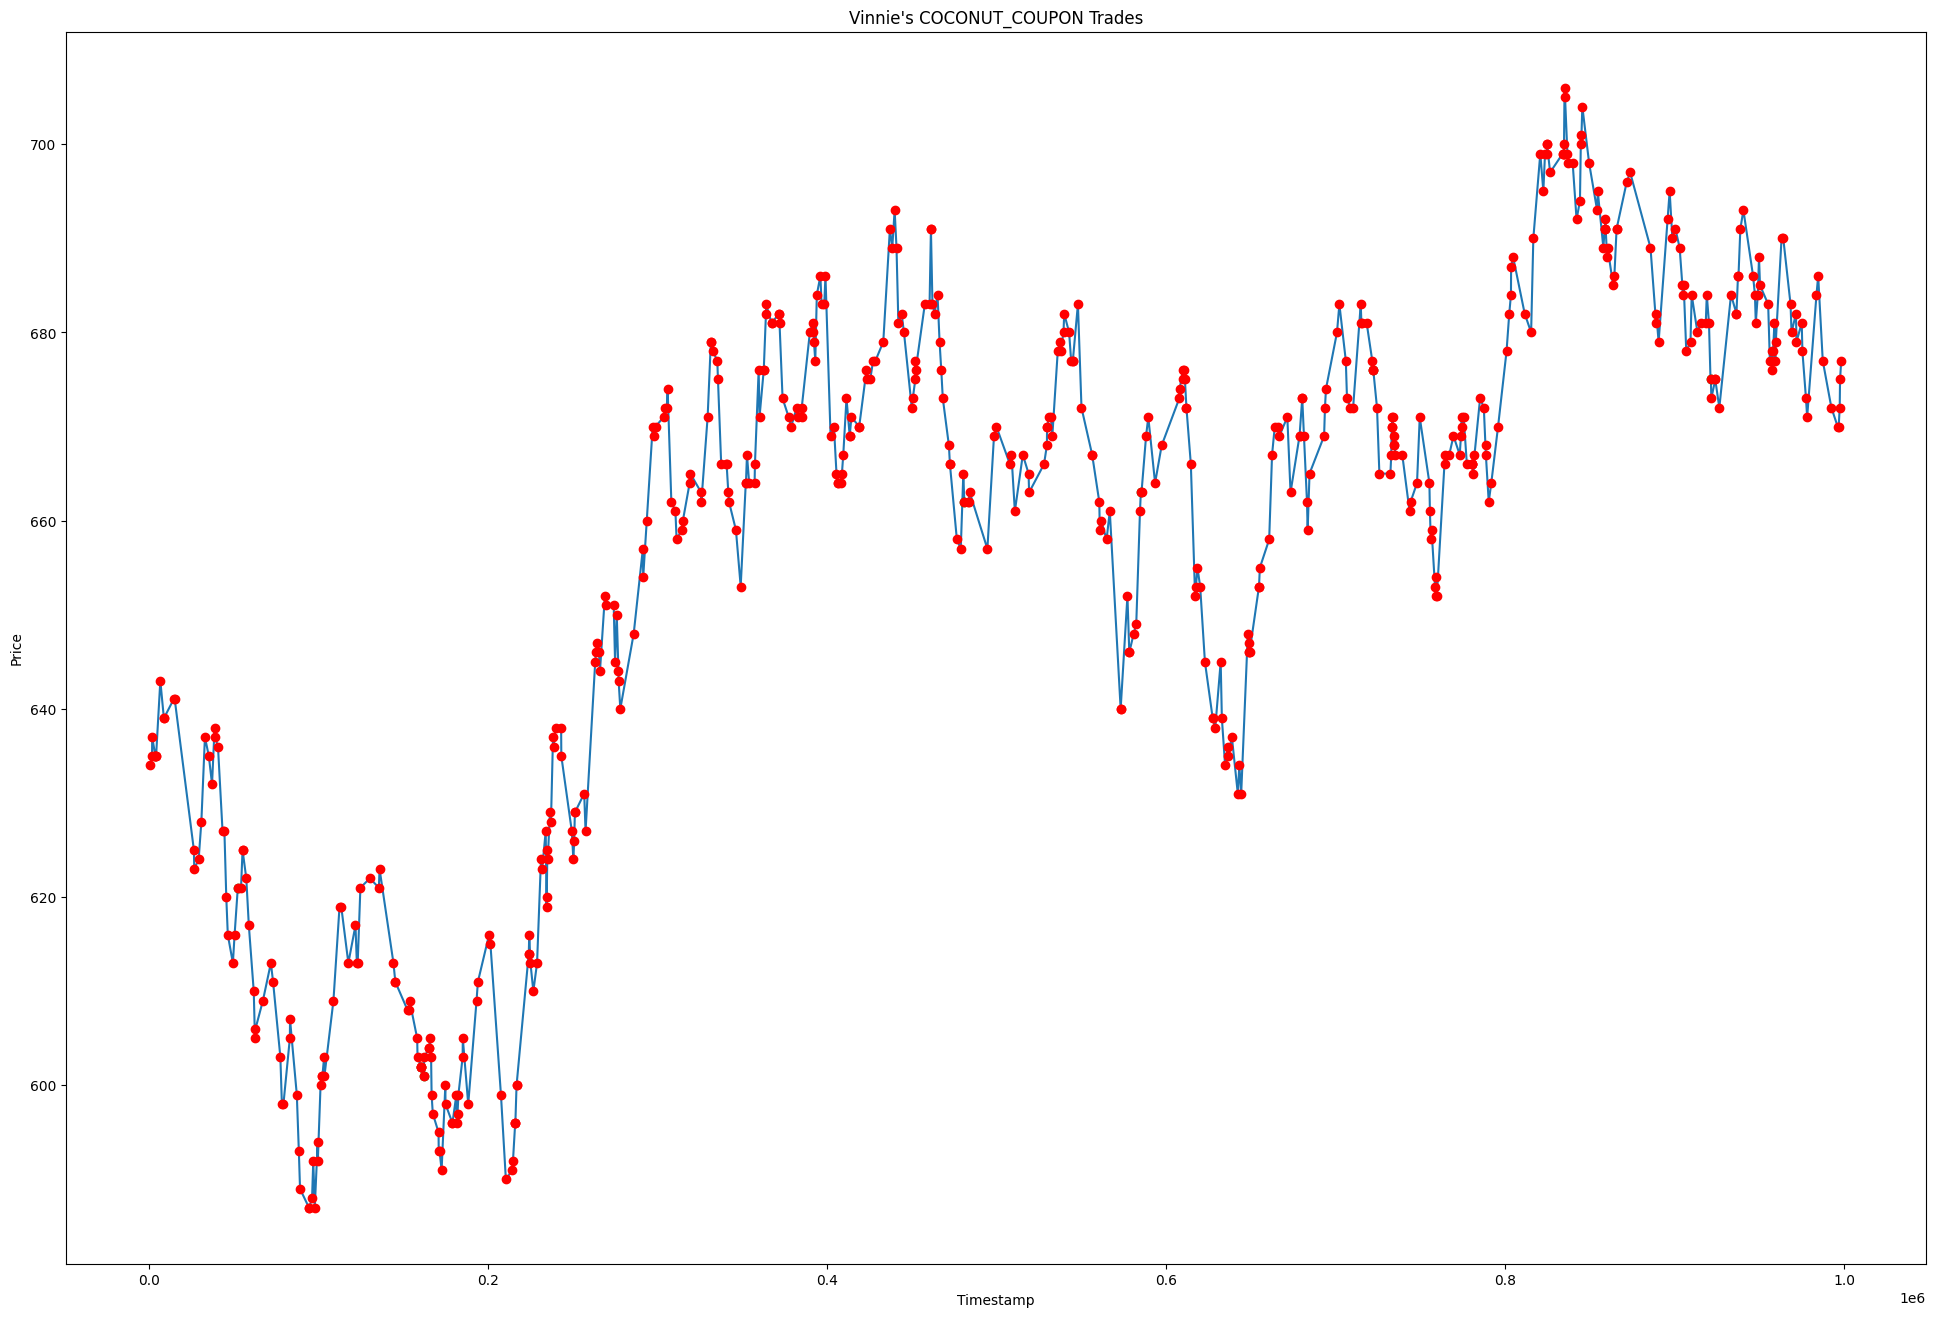

In [32]:

def plot_trader_product(trader_name, product_name, df):
    # Filter the dataframe to only include the desired trader and product
    trader_product_df = df[(df['buyer'] == trader_name) | (df['seller'] == trader_name)]
    trader_product_df = trader_product_df[trader_product_df['symbol'] == product_name]
    plt.figure(figsize=(24, 16)) 
    # Plot the price curve  
    plt.plot(trader_product_df['timestamp'], trader_product_df['price'])
    
    # Highlight the points where the trader bought or sold the product
    buys = trader_product_df[trader_product_df['buyer'] == trader_name]
    sells = trader_product_df[trader_product_df['seller'] == trader_name]
    plt.plot(buys['timestamp'], buys['price'], 'go')  # green circles for buys
    plt.plot(sells['timestamp'], sells['price'], 'ro')  # red circles for sells
    
    # Add title and labels
    plt.title(f"{trader_name}'s {product_name} Trades")
    plt.xlabel("Timestamp")
    plt.ylabel("Price")
    
    # Show the plot
    plt.show()

plot_trader_product("Vinnie", "COCONUT_COUPON", dfs[3])